In [ ]:
#import of required libraries
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#intermediate function to calculate gradient using the whole dataset and current parameters "a"
def GD_grad_calc(n_objects,xy,grad_loss, a): #n_objects-number of objects in dataset; xy-table with x- and y-values, grad_loss-gradient of loss function, a -current parameters to optimize
  g=np.zeros(len(a))
  for i in range(0,n_objects):
    x_batch,y_batch=xy[i:i+1,:-1],xy[i:i+1, -1:]
    g+=grad_loss(x_batch,y_batch,a)
  g=g/(n_objects)
  return g

In [ ]:
#gradient descent realization: returns final approximation a, sequence with successive approximations and total number of iteraions
#task: to optimize loss of a function f(x,a)
def GD(grad_loss, a0, X,Y): #a0 - initial approximation, X-vector of x-values, Y-vector of y-values
  learn_rate=0.001
  sequence=np.array([])
  epsilon=0.000001
  grad_iter=1

  n_obs = X.shape[0]
  xy = np.c_[X.reshape(n_obs, -1), Y.reshape(n_obs, 1)]
  g=GD_grad_calc(n_obs,xy,grad_loss,a0)
  a=a0-learn_rate*g
  sequence=np.append(sequence,a)
  while (abs(np.linalg.norm(a-a0))>epsilon):
    a0=a
    g=GD_grad_calc(n_obs,xy,grad_loss,a0)
    a=a0-learn_rate*g
    sequence=np.append(sequence,a)
    grad_iter+=1
  return (a,sequence,grad_iter)

In [ ]:
#calculation of gradient in ADAM-algorithm
def ADAM_grad_calc(n_objects,batch_size,xy,grad_loss, a, rng): #n_objects-number of objects in dataset; batch_size-batch size; xy-table with X,Y; grad_loss-gradient of loss function; a - current parameters; rng-random number generator to sample a mini-batch;
  rng.shuffle(xy)
  g=np.zeros(len(a))
  for start in range(0,n_objects,batch_size): #sampling mini-batches
    stop=start+batch_size
    x_batch,y_batch=xy[start:stop,:-1],xy[start:stop, -1:]
    g+=grad_loss(x_batch,y_batch,a)
  g=g/(n_objects//batch_size+1)
  return g

In [ ]:
#function that updates parameters v,s and function argument a for ADAM-algorithm
def parameter_update(v0,s0,a0,g,learn_rate,delta,p1,p2,iteration): #v0,s0,a0 - previous values of parameters and argument; g-gradient vector;learn_rate-learning rate;delta-some constant to avoid division by 0; iteration-current iteration number
  v=p1*v0+(1-p1)*g
  v_corr=v/(1-p1**iteration)
  s=p2*s0+(1-p2)*(g**2)
  s_corr=s/(1-p2**iteration)
  a=a0-learn_rate*v_corr/(np.sqrt(s_corr)+delta)
  return a,v,s

In [ ]:
#ADAM-algorithm implementation; returns final approximation a, sequence with successive approximations and total number of iteraions
def ADAM(grad_loss,a0,X,Y): #grad-loss-gradient of loss-function; a0-initial approximation; X,Y-corresponding values of x,y;
  epsilon=0.000001
  p1=0.9
  p2=0.999
  delta=0.00000001
  batch_size=2
  learn_rate=0.001

  n_obs = X.shape[0]
  xy = np.c_[X.reshape(n_obs, -1), Y.reshape(n_obs, 1)]
  rng = np.random.default_rng()
  v0=0
  s0=0
  sequence=np.array([a0])

  g=ADAM_grad_calc(n_obs,batch_size,xy,grad_loss,a0,rng)
  grad_iter=1
  a,v,s=parameter_update(v0,s0,a0,g,learn_rate,delta,p1,p2,grad_iter)

  while(abs(np.linalg.norm(a-a0))>epsilon):
    a0,v0,s0=a,v,s
    g=ADAM_grad_calc(n_obs,batch_size,xy,grad_loss,a0,rng)
    grad_iter+=1
    a,v,s=parameter_update(v0,s0,a0,g,learn_rate,delta,p1,p2,grad_iter)
    sequence=np.append(sequence,a)
  return a,sequence,grad_iter

In [ ]:
#example of function f which needs optimization
#f=a_0*x+a_1
#loss=sum((f(xi,a)-yi)**2) where a=(a_0,a_1)
#grad_loss=(2*sum(xi*(a_0*xi+a_1-yi)), 2*sum(a_0*xi+a_1-yi))
def grad_loss(x,y,a):
  dL=np.zeros(len(a))
  for i in range(len(x)):
    dL[0]+=2*(x[i]*(a[0]*x[i]+a[1]-y[i]))
    dL[1]+=2*(x[i]*a[0]+a[1]-y[i])
  return dL

In [ ]:
#real dependency: y=2*x+5
a0=np.array([1,7])
X=np.array([0,2,5,7,10])
Y=np.array([5,9,15,19,25])
a_GD,sequence_GD,grad_iter_GD=GD(grad_loss,a0,X,Y)
a_ADAM,sequence_ADAM,grad_iter_ADAM=ADAM(grad_loss,a0,X,Y)
print(a_GD,a_ADAM)

[1.99980551 5.00142844] [1.99997108 5.00020365]


In [ ]:
#get approximations of vector components a
def getComponents(sequence): #sequence-sequence of successive approximations of a_0,a_1-pairs
  seq_x=np.array([])
  seq_y=np.array([])
  for i in range(len(sequence)):
    if(i%2==0):
      seq_x=np.append(seq_x,sequence[i])
    else:
      seq_y=np.append(seq_y,sequence[i])
  return (seq_x,seq_y)

In [ ]:
#get differences between two subsequent approximations of a_0, a_1
def getDifferences(seq_x,seq_y):
  diff_seq_x=np.array([])
  diff_seq_y=np.array([])
  for i in range(1,len(seq_x)):
    diff_seq_x=np.append(diff_seq_x,seq_x[i]-seq_x[i-1])
    diff_seq_y=np.append(diff_seq_y,seq_y[i]-seq_y[i-1])
  return diff_seq_x,diff_seq_y

In [ ]:
#find differences (next-previous)
seq_x_GD,seq_y_GD=getComponents(sequence_GD)
seq_x_ADAM,seq_y_ADAM=getComponents(sequence_ADAM)
diff_seq_x_GD,diff_seq_y_GD=getDifferences(seq_x_GD,seq_y_GD)
diff_seq_x_ADAM,diff_seq_y_ADAM=getDifferences(seq_x_ADAM,seq_y_ADAM)

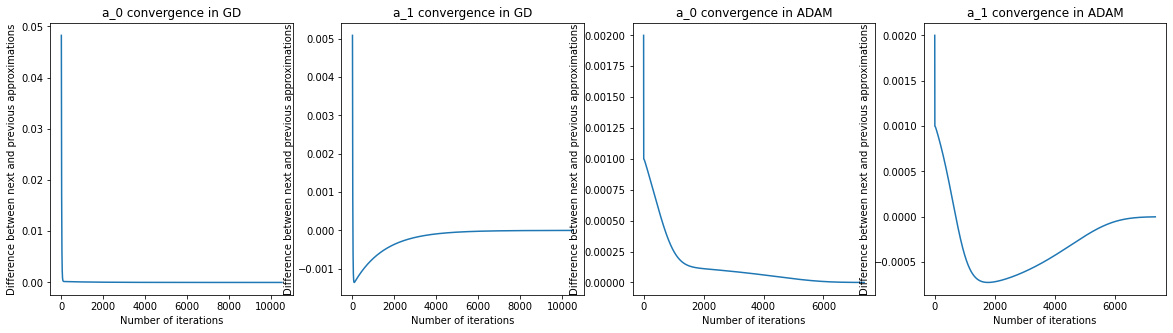

In [ ]:
#visualization of dependences delta(a) as a function of number of iterations
sequences=[diff_seq_x_GD,diff_seq_y_GD,diff_seq_x_ADAM,diff_seq_y_ADAM]
titles=["a_0 convergence in GD", "a_1 convergence in GD", "a_0 convergence in ADAM", "a_1 convergence in ADAM"]
iters=[grad_iter_GD-1,grad_iter_GD-1,grad_iter_ADAM-1,grad_iter_ADAM-1]
fig, axs = plt.subplots(1, 4, figsize = (20, 5))
for i in range(4):
    axs[i].set_xlabel("Number of iterations")
    axs[i].set_ylabel("Difference between next and previous approximations")
    axs[i].set_title(titles[i])
    axs[i].plot(range(0,iters[i]),sequences[i])

plt.show()

Conclusion: as it can be seen from values of argument a, both models (Gradient Descent and ADAM) perform decently outputing close values. However, number of iterations that requires gradient descent is higher than this in ADAM-model which means the second model converges faster because of combining ideas of momentum and RMSProp methods.